For example, the file http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data contains data on concentrations of 13 different chemicals in wines grown in the same region in Italy that are derived from three different cultivars. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns






data = pd.read_csv("wine.data", header=None)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
data.V1 = data.V1.astype(str)
X = data.loc[:, "V2":]  # independent variables data
y = data.V1  # dependednt variable data
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Once you have read a multivariate data set into python, the next step is usually to make a plot of the data.
One common way of plotting multivariate data is to make a matrix scatterplot, showing each pair of variables plotted against each other.

C:\Users\irina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


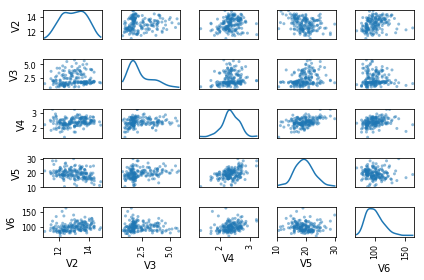

In [4]:
pd.tools.plotting.scatter_matrix(data.loc[:, "V2":"V6"], diagonal="kde")
plt.tight_layout()
plt.show()

In this matrix scatterplot, the diagonal cells show histograms of each of the variables, in this case the concentrations of the first five chemicals (variables V2, V3, V4, V5, V6).

Each of the off-diagonal cells is a scatterplot of two of the five chemicals, for example, the second cell in the first row is a scatterplot of V2 (y-axis) against V3 (x-axis).

If you see an interesting scatterplot for two variables in the matrix scatterplot, you may want to plot that scatterplot in more detail, with the data points labelled by their group (their cultivar in this case).

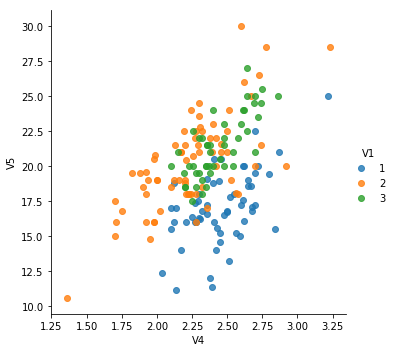

In [5]:
sns.lmplot("V4", "V5", data, hue="V1", fit_reg=False)

Another type of plot that is useful is a profile plot, which shows the variation in each of the variables, by plotting the value of each of the variables for each of the samples.

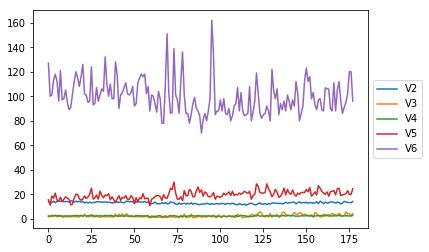

In [6]:
ax = data[["V2","V3","V4","V5","V6"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [7]:
X.apply(np.mean)

V2      13.000618
V3       2.336348
V4       2.366517
V5      19.494944
V6      99.741573
V7       2.295112
V8       2.029270
V9       0.361854
V10      1.590899
V11      5.058090
V12      0.957449
V13      2.611685
V14    746.893258
dtype: float64

In [8]:
X.apply(np.std)

V2       0.809543
V3       1.114004
V4       0.273572
V5       3.330170
V6      14.242308
V7       0.624091
V8       0.996049
V9       0.124103
V10      0.570749
V11      2.311765
V12      0.227929
V13      0.707993
V14    314.021657
dtype: float64

We can then calculate the mean and standard deviations of the 13 chemicals’ concentrations, for just the cultivar 2 samples

In [9]:
class2data = data[y=="2"]

In [10]:
class2data.loc[:, "V2":].apply(np.mean)

V2      12.278732
V3       1.932676
V4       2.244789
V5      20.238028
V6      94.549296
V7       2.258873
V8       2.080845
V9       0.363662
V10      1.630282
V11      3.086620
V12      1.056282
V13      2.785352
V14    519.507042
dtype: float64

In [11]:
class2data.loc[:, "V2":].apply(np.std)

V2       0.534162
V3       1.008391
V4       0.313238
V5       3.326097
V6      16.635097
V7       0.541507
V8       0.700713
V9       0.123085
V10      0.597813
V11      0.918393
V12      0.201503
V13      0.493064
V14    156.100173
dtype: float64

In [12]:
data_2d = data[['V3', 'V4']].values
mean = np.mean(data_2d, axis=0)
cov = np.cov(data_2d, rowvar=0)

In [13]:
mean

array([2.33634831, 2.36651685])

In [14]:
cov

array([[1.2480154 , 0.05027704],
       [0.05027704, 0.07526464]])

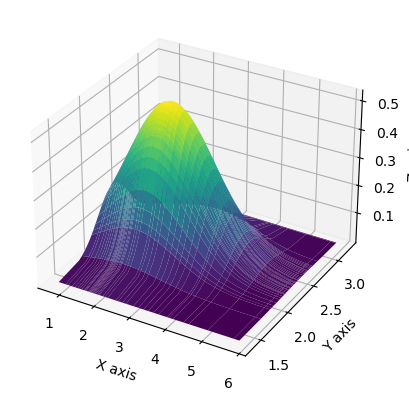

In [18]:
import matplotlib.pyplot as plt
from   matplotlib import cm
from   mpl_toolkits.mplot3d import Axes3D
from   scipy.stats import multivariate_normal
X = sorted(data['V3'].values)
Y = sorted(data['V4'].values)
X, Y = np.meshgrid(X, Y)
F = multivariate_normal(mean, cov)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = F.pdf(pos)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## Байесовская регрессия

In [3]:
import pymc3 as pm
print('Running on the PyMC3 v{}'.format(pm.__version__))
basic_model =  pm.Model()

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on the PyMC3 v3.11.5


In [4]:
with basic_model as bm:

    #Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Deterministics
    mu = alpha + beta*data['V3'].values
    
    # Likelihood 
    Ylikelihood = pm.Normal('Ylikelihood', mu=mu, sd=sigma, observed=data['V4'].values)

In [5]:
trace = pm.sample(draws=2000,model=bm)

c:\Users\Anaxagor\anaconda3\envs\gpn\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\Users\Anaxagor\anaconda3\envs\gpn\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\Users\Anaxagor\anaconda3\envs\gpn\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 395 seconds.
The acceptance probability does not match the target. It is 0.8939208516096867, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\Anaxagor\AppData\Local\Temp\ipykernel_14424\4255668653.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\Anaxagor\anaconda3\envs\gpn\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot: title={'center': 'alpha'}>,
        <AxesSubplot: title={'center': 'alpha'}>],
       [<AxesSubplot: title={'center': 'beta'}>,
        <AxesSubplot: title={'center': 'beta'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>]], dtype=object)

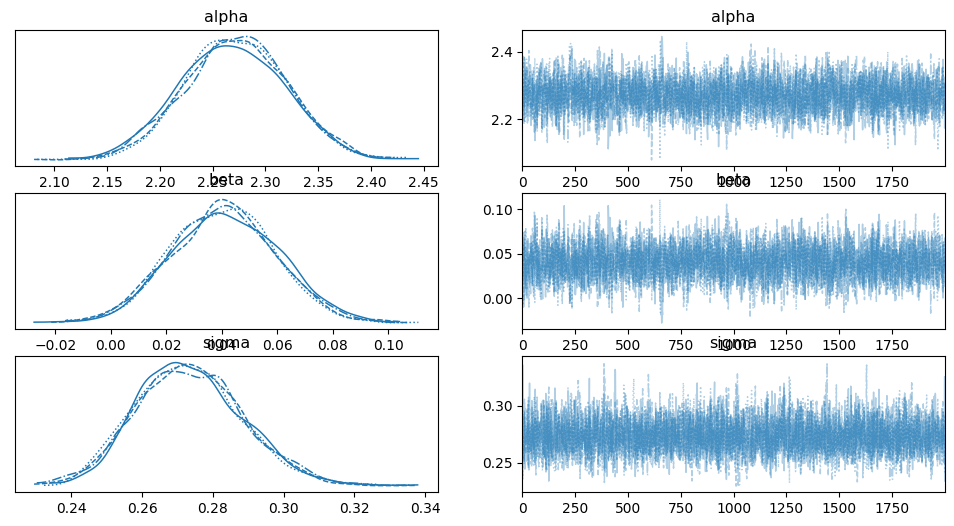

In [6]:
pm.traceplot(trace)

In [10]:
len(trace['alpha'])

8000

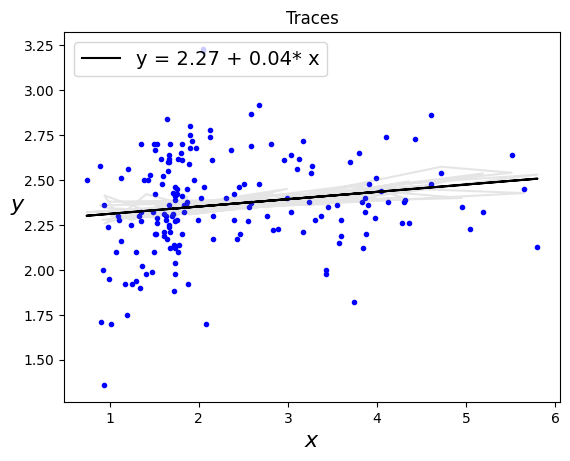

In [14]:
x = data['V3'].values
y = data['V4'].values
plt.plot(x, y, 'b.')

idx = range(0, len(trace['alpha']), 45)
alpha_m = trace['alpha'].mean()
beta_m = trace['beta'].mean()

plt.plot(x, trace['alpha'][idx] + trace['beta'][idx] *x, c='gray', alpha=0.2)
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f}* x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)
plt.title("Traces")
plt.show()